## Exploratory Data Visualization Part 1


### Univariate Exploration

>We first will show how the distribution of main features: `duration_sec` and `minimum_distance_miles` looks like after importing the archived data to dataFrame called `df_plt`.

In [2]:
#import needed packages
import pandas as pd    # For database management
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import io
import csv

%matplotlib inline

In [3]:
df_plt = pd.read_csv('master_data.csv',low_memory=False)

In [4]:
#We start saving plots in plots sub folder from working directory
folder_plots = 'plots'
if not os.path.exists(folder_plots):
    os.makedirs(folder_plots)

In [5]:
#import FuncFormatter and ticker so that we show counts in terms of thousands of units (K) or millions of units (M)
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.fK' % (x*1e-3)

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

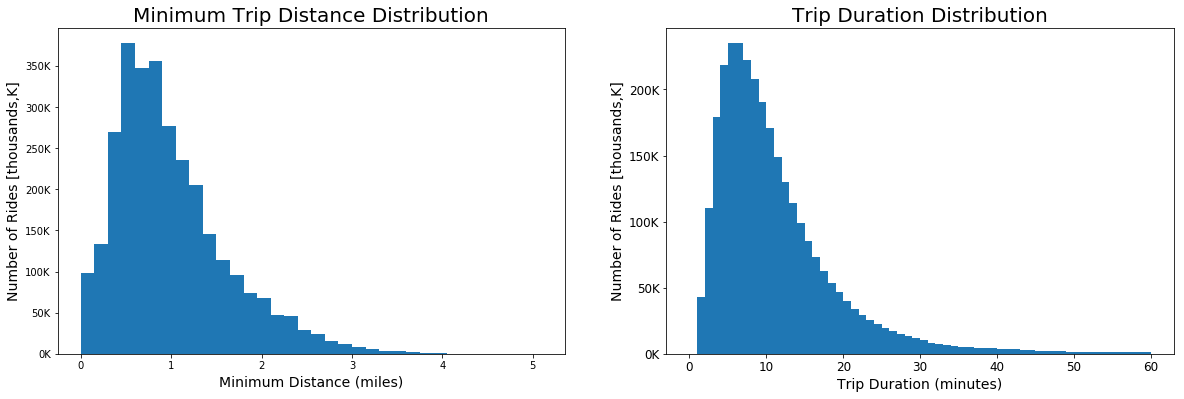

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize = [20,6])
ax1, ax2 = ax.flatten()  # flatten a 2d NumPy array to 1d

#histogram on left, distribution of minimum_distance_miles 
binsize = 0.15
#we exteded from 3 to 5 miles for bining purpose
bins = np.arange(0, 5+binsize, binsize)
ax1.hist(data = df_plt, x = 'minimum_distance_miles', bins = bins)
ax1.yaxis.set_major_formatter(FuncFormatter(thousands))
ax1.set_xlabel('Minimum Distance (miles)',fontsize=14)
ax1.set_ylabel('Number of Rides [thousands,K]',fontsize=14)
ax1.axes.set_title('Minimum Trip Distance Distribution',fontsize=20)
ax1.grid(False)

binsize = 1
# we show up to 60 minutes for bining purpose
bins = np.arange(0, 60+binsize, binsize)
ax2.hist(data = df_plt, x = df_plt['duration_sec']/60, bins = bins)
ax2.yaxis.set_major_formatter(FuncFormatter(thousands))
ax2.set_xlabel('Trip Duration (minutes)',fontsize=14)
ax2.set_ylabel('Number of Rides [thousands,K]',fontsize=14)
ax2.axes.set_title('Trip Duration Distribution',fontsize=20)
ax2.tick_params(labelsize=12)
ax2.grid(False)
plt.savefig(folder_plots + '\\'+'Univariate_Distance_TripDuration_Rides.png')
plt.show();

>Both the trip distance and trip duration shows `Right-Skewed` (Positive Skewness). Mean and Mode are to the right of the Mode (peak).

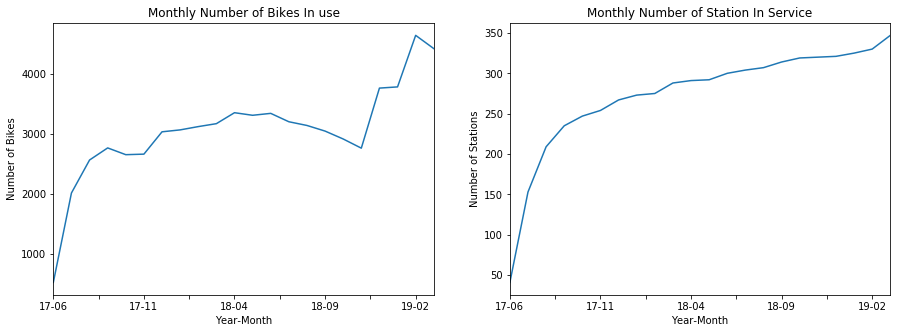

In [7]:
# start with a standard-scaled plot
plt.figure(figsize = [15, 5]) # larger figure size for subplots 

# histogram on left, 
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1 
df_plt.groupby('start_year_month')['bike_id'].nunique().plot()
plt.title('Monthly Number of Bikes In use')
plt.xlabel('Year-Month')
plt.ylabel("Number of Bikes")

# histogram on right, 
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2 
df_plt.groupby('start_year_month')['start_station_id'].nunique().plot()
plt.title('Monthly Number of Station In Service')
plt.xlabel('Year-Month')
plt.ylabel("Number of Stations")
plt.savefig(folder_plots + '\\'+'Univariate_NumberOfBikes_NumberOfStations.png')
plt.show();

>We observed that there are period where number of bikes in use decrease from 3.3K  peak in March 2018 down to 2.8k End of the year 2018. Then the number of bikes increased drastically to 6801 as Ford GoBike Plus semi electric beleived to be brought into services. 

>The number of stations increased dramatically from low 50s to 250 before November of 2017. Then constantly adding for the remaining 2018 and 2019. The latest number of station shows around 361.

### Does `member gender` or `member age` or `user_type` or `bike_share_for_all_trip` 
### Have any relationship with the number of Trips, Distances or Durations?

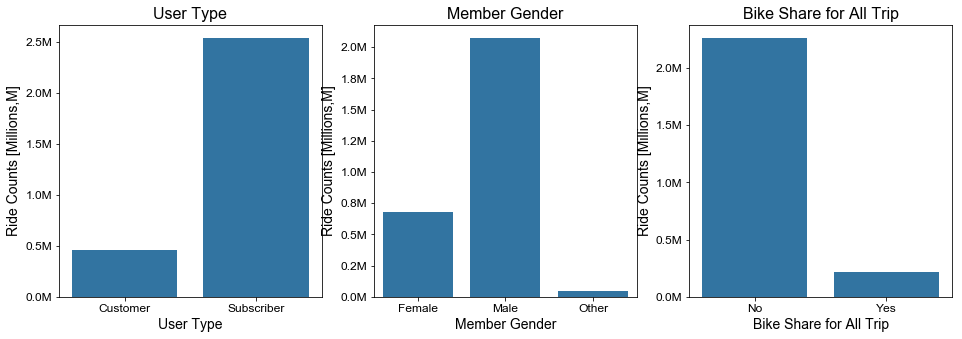

In [8]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(nrows=1,ncols=3, figsize = [16,5])
ax1, ax2, ax3 = ax.flatten()  # flatten a 2d NumPy array to 1d
default_color = sb.color_palette()[0]

sb.countplot(data = df_plt, x = 'user_type', color = default_color, ax = ax1,orient ='v')
ax1.grid(False)
ax1.yaxis.set_major_formatter(FuncFormatter(millions))
ax1.tick_params(labelsize=12)
ax1.set_xlabel("User Type",fontsize=14)
ax1.set_ylabel("Ride Counts [Millions,M]",fontsize=14)
ax1.axes.set_title("User Type",fontsize=16)

sb.countplot(data = df_plt, x = 'member_gender', color = default_color, ax = ax2, orient='v')
ax2.grid(False)
ax2.yaxis.set_major_formatter(FuncFormatter(millions))
ax2.tick_params(labelsize=12)
ax2.set_xlabel("Member Gender",fontsize=14)
ax2.set_ylabel("Ride Counts [Millions,M]",fontsize=14)
ax2.axes.set_title("Member Gender",fontsize=16)

sb.countplot(data = df_plt, x = 'bike_share_for_all_trip', color = default_color, ax = ax3, orient='v')
ax3.grid(False)
ax3.yaxis.set_major_formatter(FuncFormatter(millions))
ax3.tick_params(labelsize=12)
ax3.set_xlabel("Bike Share for All Trip",fontsize=14)
ax3.set_ylabel("Ride Counts [Millions,M]",fontsize=14)
ax3.axes.set_title("Bike Share for All Trip",fontsize=16)
sb.set_style("whitegrid")
plt.savefig(folder_plots + '\\'+'Univariate_UserType_Gender_Rideshare_Counts.png')
plt.show();

In [9]:
print('Subscriber user type are',round(df_plt.user_type.value_counts()[0]*100/df_plt.shape[0],1),'%')
print('Custemer user type are',round(df_plt.user_type.value_counts()[1]*100/df_plt.shape[0],1),'%')
print('Male riders are',round(df_plt.member_gender.value_counts()[0]*100/df_plt.shape[0],1),'%')
print('Female riders are',round(df_plt.member_gender.value_counts()[1]*100/df_plt.shape[0],1),'%')
print('No Bike Share for all trips are',round(df_plt.bike_share_for_all_trip.value_counts()[0]*100/df_plt.shape[0],1),'%')
print('Bike Share for all trips are',round(df_plt.bike_share_for_all_trip.value_counts()[1]*100/df_plt.shape[0],1),'%')

Subscriber user type are 84.7 %
Custemer user type are 15.3 %
Male riders are 69.3 %
Female riders are 22.6 %
No Bike Share for all trips are 75.6 %
Bike Share for all trips are 7.3 %


` User Type`
- Subscriber user type are 84.7 %
- Custemer user type are 15.3 %

` Member Gender`
- Male riders are 69.3 %
- Female riders are 22.6 %

` Bike Share For All`
- No Bike Share for all trips are 75.6 %
- Bike Share for all trips are 7.3 %

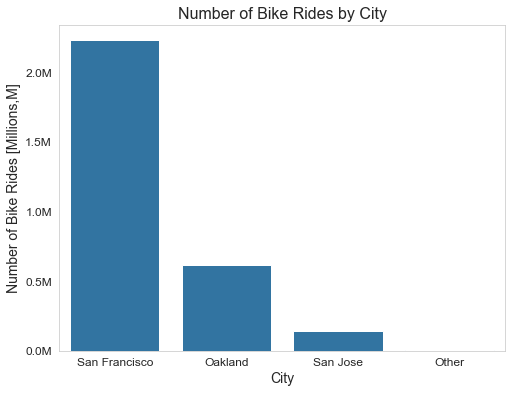

In [10]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
plt.close('all')
fig, ax = plt.subplots(figsize = [8,6])
sb.set_style("whitegrid")
default_color = sb.color_palette()[0]
sb.countplot(data = df_plt, x = 'city', color = default_color, ax = ax,orient ='h')
ax.grid(False)
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.tick_params(labelsize=12)
ax.set_xlabel("City",fontsize=14)
ax.set_ylabel("Number of Bike Rides [Millions,M]",fontsize=14)
ax.axes.set_title("Number of Bike Rides by City",fontsize=16)
plt.savefig(folder_plots + '\\'+'Univariate_City_Counts.png');

In [11]:
print('San Francisco riders are',round(df_plt.city.value_counts()[0]*100/df_plt.shape[0],1),'%')
print('Oakland riders are',round(df_plt.city.value_counts()[1]*100/df_plt.shape[0],1),'%')
print('San Jose riders are',round(df_plt.city.value_counts()[2]*100/df_plt.shape[0],1),'%')

San Francisco riders are 74.4 %
Oakland riders are 20.7 %
San Jose riders are 4.8 %


`city`
- San Francisco riders are 74.4%
- Oakland riders are 20.7%
- San Jose riders are 4.8%

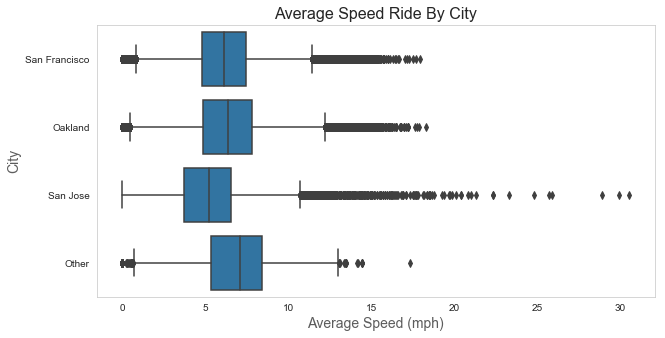

In [12]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0] 
ax = sb.boxplot(data = df_plt, x = 'average_speed_mph', y = 'city', color = base_color,\
           order = ['San Francisco','Oakland','San Jose','Other'])
ax.grid(False)
ax.set_xlabel("Average Speed (mph)",fontsize=14,alpha=0.75)
ax.set_ylabel("City",fontsize=14,alpha=0.75)
ax.axes.set_title("Average Speed Ride By City",fontsize=16)
plt.savefig(folder_plots + '\\'+'Univariate_City_AverageSpeed.png');

>Oakland riders seems have a little bit faster than San Francisco riders. Interestingly San Jose riders are the slowest of all. For Other riders, areas away from city, they are faster than those in city as expected.

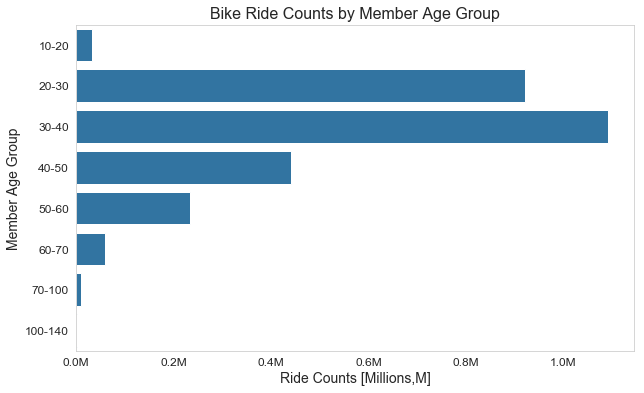

In [13]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
plt.close('all')
fig, ax = plt.subplots(figsize = [10,6])
sb.set_style("whitegrid")
default_color = sb.color_palette()[0]
age_group_order = ['10-20','20-30','30-40','40-50','50-60','60-70','70-100','100-140']
sb.countplot(data = df_plt, y = 'member_age_group', color = default_color, ax = ax, orient='h',order=age_group_order)
ax.grid(False)
ax.xaxis.set_major_formatter(FuncFormatter(millions))
ax.tick_params(labelsize=12)
ax.set_ylabel("Member Age Group",fontsize=14)
ax.set_xlabel("Ride Counts [Millions,M]",fontsize=14)
ax.axes.set_title("Bike Ride Counts by Member Age Group",fontsize=16)
plt.savefig(folder_plots + '\\'+'Univariate_MemberAgeGroup_Rides.png');
plt.show()

>The largest number of riders,67.2%, are in the age range of 20 to 40 years old.

### Bivariate Exploration

In [14]:
#created list of numerical and categorical variables
numeric_vars = ['duration_hr','minimum_distance_miles', 'member_age']
category_var = ['start_weekday_name', 'start_month_name','user_type', 'member_gender', \
                'bike_share_for_all_trip', 'city', 'member_age_group']

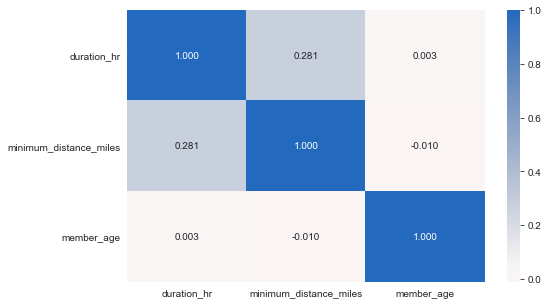

In [15]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_plt[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show();

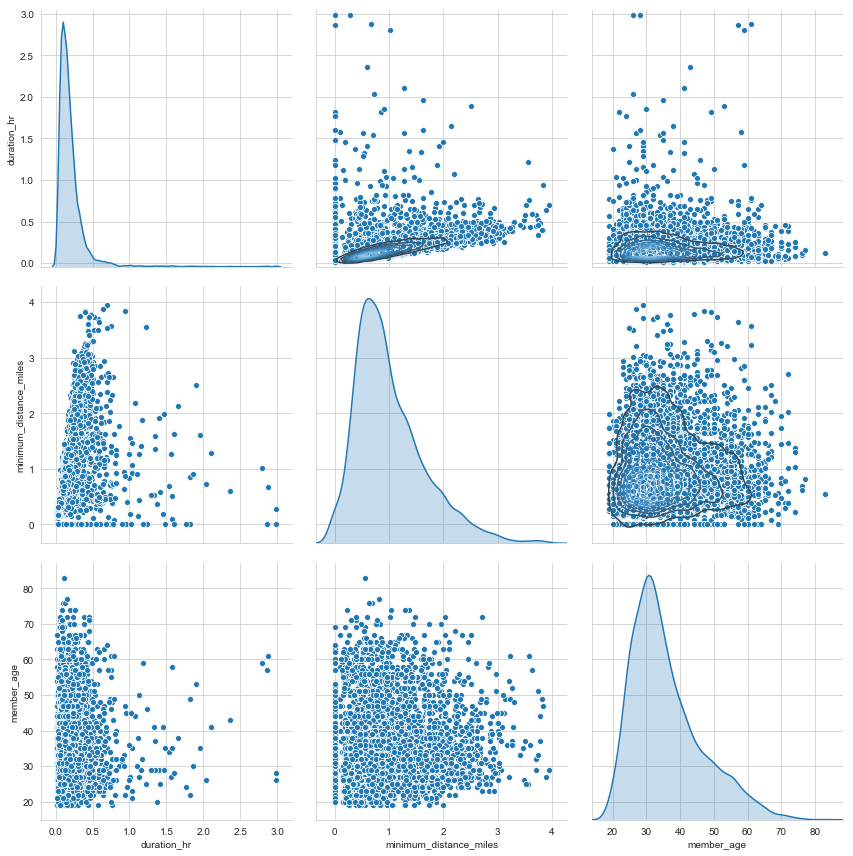

In [16]:
age_list = ['10-20','20-30','30-40','40-50','50-60','60-70','70-100',]
data = df_plt[df_plt.member_age_group.isin(age_list)]
data = data.sample(5000)
sb.pairplot(data, vars=numeric_vars,palette="Set2",dropna=True, diag_kind="kde", height=4)\
.map_upper(sb.kdeplot, cmap="Blues_d");
plt.savefig(folder_plots + '\\'+'Pairplot user type.png');

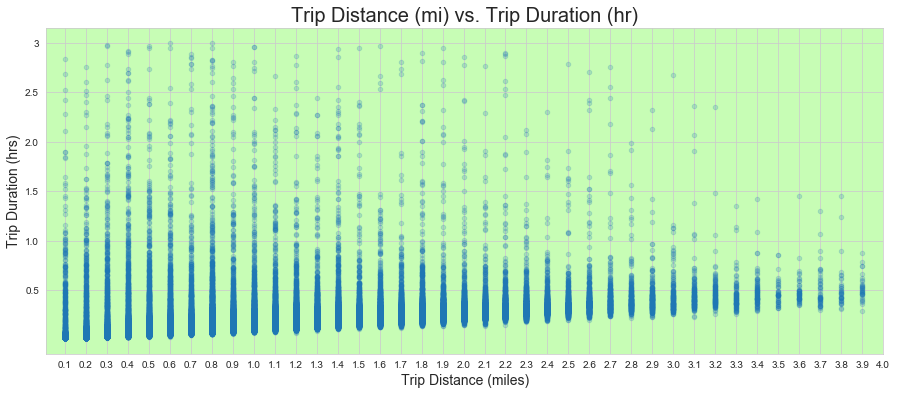

In [17]:
data = df_plt.copy()
data['distance_mile_group'] = ""
data = data.query('minimum_distance_miles > 0 & member_gender !="Other"')

xlim_max = 4.1
bins = np.around(np.arange(0.1,xlim_max,0.1),decimals=2).tolist()
data['distance_mile_group'] = pd.cut(data.minimum_distance_miles,bins, \
                                      labels=bins[:-1]).sample(100000)

fig = plt.figure(figsize = [15, 6])
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index

ax.scatter(data = data, x = 'distance_mile_group', y = 'duration_hr', alpha = 1/5,\
             marker='o', s=20)
ax.set_facecolor('#c7fdb5')
plt.title('Trip Distance (mi) vs. Trip Duration (hr)',fontsize=20)
plt.xticks(np.array(bins), bins,rotation=0,fontsize=10)
plt.xlim(0.01, 4)
plt.xlabel('Trip Distance (miles)',fontsize=14)

plt.yticks([0.5, 1.0, 1.5, 2.0, 2.5, 3], [0.5, 1.0, 1.5, 2.0, 2.5, 3],fontsize=10)
plt.ylabel('Trip Duration (hrs)',fontsize=14)
plt.show();

### When are most trips taken in terms of `time of day, day of the week, or month of the year`?

>Here we show hours of the day by weekdays and by month of the year

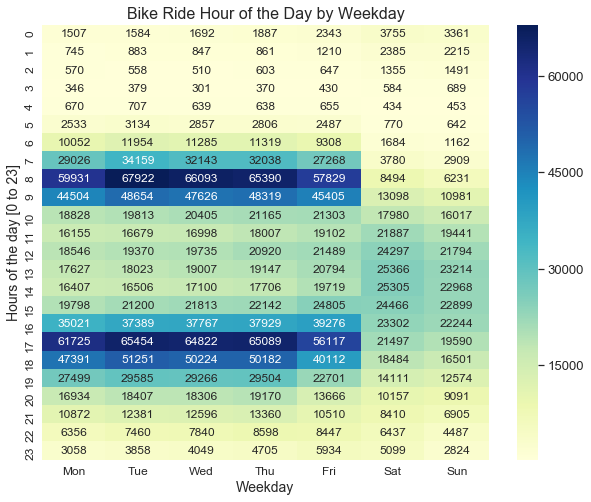

In [18]:
plt.close('all')
fig, ax = plt.subplots(figsize = [10,8])
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
data = pd.pivot_table(df_plt,index='start_hour',columns='start_weekday_name',values='bike_id',aggfunc ='count')
data = pd.DataFrame(data,data.index,day_order)

sb.set(font_scale=1.2)
ax = sb.heatmap(data,annot = True, fmt = 'd',annot_kws={"size": 12},cmap="YlGnBu")
ax.tick_params(labelsize=12)
ax.set_ylabel("Hours of the day [0 to 23]",fontsize=14)
ax.set_xlabel("Weekday",fontsize=14)
ax.axes.set_title("Bike Ride Hour of the Day by Weekday",fontsize=16)
plt.savefig(folder_plots + '\\'+'Bivariate_HourOftheDay_Weekday_Rides.png'); 

>We see 8th and 17th hours are the busiest hours for each work week as expected, typical work hour start and end times. 2nd busiest are 9th and 18th hours, followed by 7th and 16th hours all around the work start and end periods. Tuesday seems the most used rides.

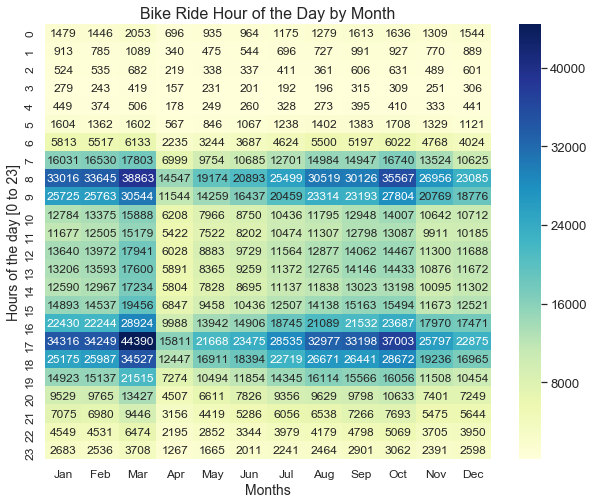

In [19]:
plt.close('all')
fig, ax = plt.subplots(figsize = [10,8])
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data = pd.pivot_table(df_plt,index='start_hour',columns='start_month_name',values='bike_id',aggfunc ='count')
data = pd.DataFrame(data,data.index,month_order)

sb.set(font_scale=1.2)
ax = sb.heatmap(data,annot = True, fmt = 'd',annot_kws={"size": 12},cmap="YlGnBu")
ax.tick_params(labelsize=12)
ax.set_ylabel("Hours of the day [0 to 23]",fontsize=14)
ax.set_xlabel("Months",fontsize=14)
ax.axes.set_title("Bike Ride Hour of the Day by Month",fontsize=16)
plt.savefig(folder_plots + '\\'+'Bivariate_HourOftheDay_Month_Rides.png'); 

>Busiest hours of the day generally follows the same as previously observed.March is the busiest and April is the slowest month of the year.

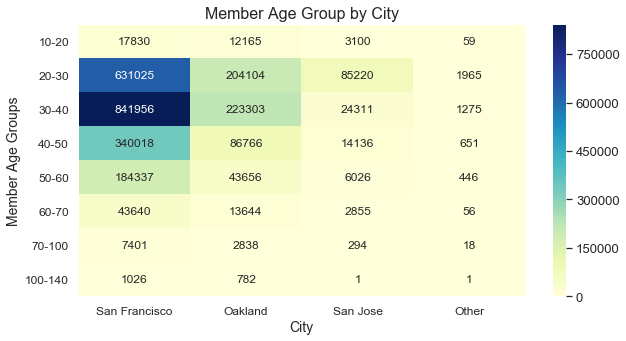

In [20]:
plt.close('all')
fig, ax = plt.subplots(figsize = [10,5])
city_order = ['San Francisco','Oakland','San Jose','Other']
age_group_order = ['10-20','20-30','30-40','40-50','50-60','60-70','70-100','100-140']

data = pd.pivot_table(df_plt,index='member_age_group',columns='city',values='bike_id',aggfunc ='count')
df = data.reindex(index=age_group_order, columns=city_order)

ax = sb.heatmap(df,annot = True, fmt = 'd',annot_kws={"size": 12},cmap="YlGnBu")
ax.tick_params(labelsize=12)
ax.set_ylabel("Member Age Groups",fontsize=14)
ax.set_xlabel("City",fontsize=14)
ax.axes.set_title("Member Age Group by City",fontsize=16)
plt.savefig(folder_plots + '\\'+'Bivariate_MemberAgeGroup_City_Rides.png'); 

>San Francisco member age from 30 to 40 are the heavy riders of all.

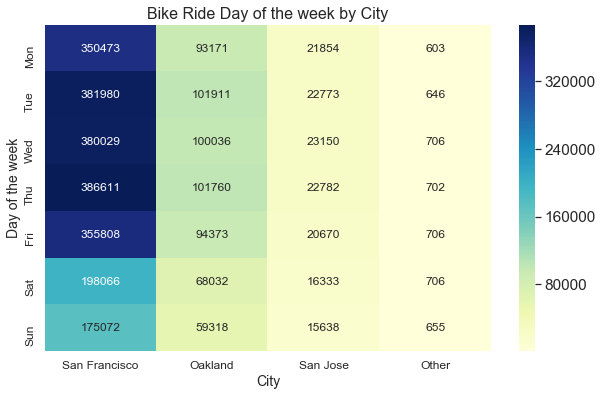

In [21]:
plt.close('all')
fig, ax = plt.subplots(figsize = [10,6])
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
city_order = ['San Francisco','Oakland','San Jose','Other']

data = pd.pivot_table(df_plt,index='start_weekday_name',columns='city',values='bike_id',aggfunc ='count')
df = data.reindex(index=day_order, columns=city_order)
sb.set(font_scale=1.4)
ax = sb.heatmap(df,annot = True, fmt = 'd',annot_kws={"size": 12},cmap="YlGnBu")
ax.tick_params(labelsize=12)
ax.set_ylabel("Day of the week",fontsize=14)
ax.set_xlabel("City",fontsize=14)
ax.axes.set_title("Bike Ride Day of the week by City",fontsize=16)
plt.savefig(folder_plots + '\\'+'Bivariate_DayOftheWeek_City_Rides.png'); 

>For San Francisco Thursday is the busiest of all weekdays, Tuesday is the second busiest. For the other city it seems the peak days are not the same

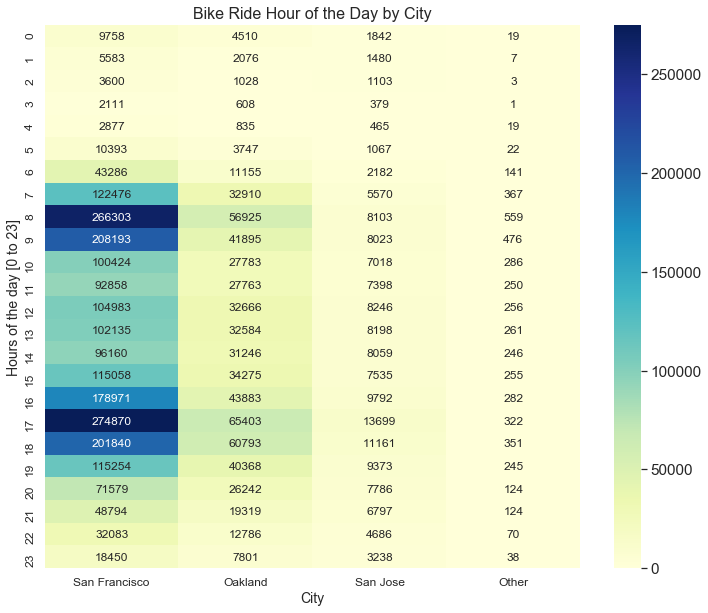

In [22]:
plt.close('all')
fig, ax = plt.subplots(figsize = [12,10])
data = pd.pivot_table(df_plt,index='start_hour',columns='city',values='bike_id',aggfunc ='count')
data = pd.DataFrame(data,data.index,['San Francisco','Oakland','San Jose','Other'])
sb.set(font_scale=1.4)
ax = sb.heatmap(data,annot = True,fmt = 'd', annot_kws={"size": 12},cmap="YlGnBu")
ax.tick_params(labelsize=12)
ax.set_ylabel("Hours of the day [0 to 23]",fontsize=14)
ax.set_xlabel("City",fontsize=14)
ax.axes.set_title("Bike Ride Hour of the Day by City",fontsize=16)
plt.savefig(folder_plots + '\\'+'Bivariate_HourOftheDay_City_Rides.png'); 

>San Francisco 8th and 17hrs are the busiest hours of the day, which is consistent with other cities too.

#### Bivariate Member Age Group and User Type relationship

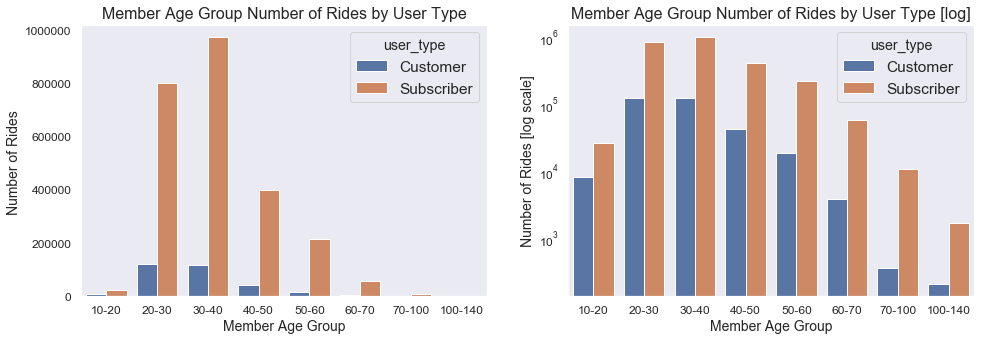

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize = [16,5])
ax1, ax2 = ax.flatten()  # flatten a 2d NumPy array to 1d
default_color = sb.color_palette()[0]
age_group_order = ['10-20','20-30','30-40','40-50','50-60','60-70','70-100','100-140']

#left histogram, row count
ax1 = sb.countplot(data = df_plt, x = 'member_age_group', hue = 'user_type',order = age_group_order,ax = ax1)
ax1.grid(False)
ax1.tick_params(labelsize=12)
ax1.set_ylabel("Number of Rides ",fontsize=14)
ax1.set_xlabel("Member Age Group",fontsize=14)
ax1.axes.set_title("Member Age Group Number of Rides by User Type",fontsize=16)

#right histogram, log scale
ax2 = sb.countplot(data = df_plt, x = 'member_age_group', hue = 'user_type',order = age_group_order,ax = ax2)
ax2.set_yscale('log')
ax2.grid(False)
ax2.tick_params(labelsize=12)
ax2.set_ylabel("Number of Rides [log scale]",fontsize=14)
ax2.set_xlabel("Member Age Group",fontsize=14)
ax2.axes.set_title("Member Age Group Number of Rides by User Type [log]",fontsize=16)
plt.savefig(folder_plots + '\\'+'Bivariate_Rides_MemberAgeGroup_UserType.png'); 

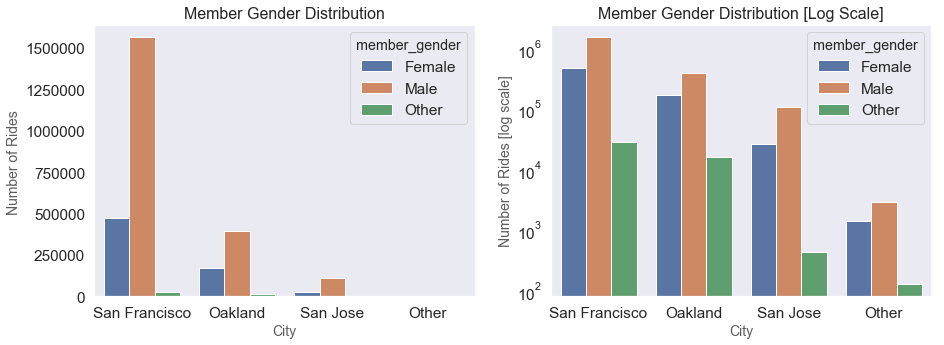

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize = [15,5])
ax1, ax2 = ax.flatten()  # flatten a 2d NumPy array to 1d
default_color = sb.color_palette()[0]

#left histogram, row count
ax1 = sb.countplot(data = df_plt, x = 'city', hue = 'member_gender',\
             order = ['San Francisco','Oakland','San Jose','Other'], ax=ax1 )
ax1.grid(False)
ax1.set_xlabel("City",fontsize=14,alpha=0.75)
ax1.set_ylabel("Number of Rides ",fontsize=14,alpha=0.75)
ax1.axes.set_title("Member Gender Distribution",fontsize=16)

#right histogram, log scale
ax2 = sb.countplot(data = df_plt, x = 'city', hue = 'member_gender',\
             order = ['San Francisco','Oakland','San Jose','Other'],ax=ax2 )
ax2.set_yscale('log')
ax2.grid(False)
ax2.set_xlabel("City",fontsize=14,alpha=0.75)
ax2.set_ylabel("Number of Rides [log scale]",fontsize=14,alpha=0.75)
ax2.axes.set_title("Member Gender Distribution [Log Scale]",fontsize=16)

plt.savefig(folder_plots + '\\'+'Bivariate_Gender_City_Rides.png');

### What is the `Weekly Average Number of Bike Rides ` by City?

>After dataframe is grouped by start_weekday_name and city, count bike_id, and number of unique bike_id. Then divide those two (counts of bike trips and number of unique bikes) to find the average bike trips in a given weekday.

In [25]:
df_bike = df_plt.groupby(['start_weekday_name','city'])['bike_id'].size().reset_index().\
merge(df_plt.groupby(['start_weekday_name','city'])['bike_id'].nunique().reset_index(),on=['start_weekday_name','city'])
df_bike = df_bike.rename(columns={"start_weekday_name": "start_weekday_name", "bike_id_x": "bike_trips","bike_id_y": "unique_bikes"})
df_bike['avg_bike_trips'] = df_bike['bike_trips']/df_bike['unique_bikes']
df_bike.nlargest(5,'avg_bike_trips')

,start_weekday_name,city,bike_trips,unique_bikes,avg_bike_trips
18,Thu,San Francisco,386611,4894,78.996935
22,Tue,San Francisco,381980,4849,78.775005
26,Wed,San Francisco,380029,4869,78.050729
2,Fri,San Francisco,355808,4878,72.941369
6,Mon,San Francisco,350473,4832,72.531664


>Station_id 18 is showing the top average bike trips of 79% which is drived from 386,611 number of total bike_trips and 4894 unique number of bikes.

### What is the `Hourly Average Number of Bike Rides` by City?

>After dataframe is grouped by start_hour and city, count bike_id, and number of unique bike_id. Then divide those two (counts of bike trips and number of unique bikes) to find the average bike trips in a given hour.

In [26]:
df_bike_hr = df_plt.groupby(['start_hour','city'])['bike_id'].count().reset_index().\
merge(df_plt.groupby(['start_hour','city'])['bike_id'].nunique().reset_index(),on=['start_hour','city'])
df_bike_hr = df_bike_hr.rename(columns={"start_hour": "start_hour", "bike_id_x": "bike_trips_hr","bike_id_y": "unique_bikes_hr"})
df_bike_hr['avg_bike_trips_hr'] = df_bike_hr['bike_trips_hr']/df_bike_hr['unique_bikes_hr']

In [27]:
df_bike_hr.nlargest(5,'avg_bike_trips_hr')

,start_hour,city,bike_trips_hr,unique_bikes_hr,avg_bike_trips_hr
70,17,San Francisco,274870,4913,55.947486
34,8,San Francisco,266303,4889,54.469830
38,9,San Francisco,208193,4883,42.636289
74,18,San Francisco,201840,4894,41.242338
66,16,San Francisco,178971,4881,36.666872


>Station_id 70 at 17th hour in San Francisco showing 274,870 total rides and 4913 unique bikes which equates to 55.95%

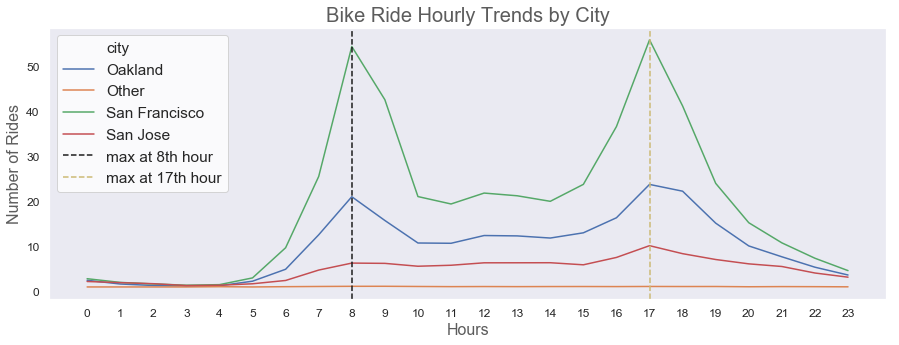

In [28]:
plt.close('all')
fig, ax = plt.subplots(figsize = [15,5])
sb.set_style("whitegrid")
ax = sb.lineplot(x='start_hour',y='avg_bike_trips_hr', hue='city',data=df_bike_hr)
ax.grid(False)
ax.tick_params(labelsize=12)
plt.xticks(np.arange(0,24,1))
plt.title('Bike Ride Hourly Trends by City',fontsize=20,alpha=0.75)
plt.xlabel('Hours',size = 16,alpha=0.75)
plt.ylabel("Number of Rides",size = 16,alpha=0.75)

xcoords = [8, 17]
colors = ['k','y']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='max at {}th hour'.format(xc), c=c, linestyle ='dashed')

plt.legend()

plt.savefig(folder_plots + '\\'+'Bike_Ride_Hourly_Trend_by_city.png');

>As previously observed this lineplot shows us the steep rise and fall around peak hours, 8th and 17th hours especially for San Francisco. Oakland follows the same as San Francisco for 8th hour but with lower magnitude. For 17th hour its rate of decrease is slower until 18th hour. San Jose, we can assume more consistency in the number of rides betwen 8th hours until 15th hours, then slowly rise at 17th hour. 

### What is the `Monthly Average Number of Bike Rides ` by City?

>After dataframe is grouped by start_month and city, count bike_id, and number of unique bike_id. Then divide those two (counts of bike trips and number of unique bikes) to find the average bike trips in a given month.

In [29]:
df_bike_month = df_plt.groupby(['start_month','city'])['bike_id'].count().reset_index().\
merge(df_plt.groupby(['start_month','city'])['bike_id'].nunique().reset_index(),on=['start_month','city'])
df_bike_month = df_bike_month.rename(columns={"start_month": "start_month", "bike_id_x": "bike_trips_month","bike_id_y": "unique_bikes_month"})
df_bike_month['avg_bike_trips_month'] = df_bike_month['bike_trips_month']/df_bike_month['unique_bikes_month']

In [30]:
df_bike_month.nlargest(5,'avg_bike_trips_month')

,start_month,city,bike_trips_month,unique_bikes_month,avg_bike_trips_month
38,10,San Francisco,232310,2465,94.243408
34,9,San Francisco,211242,2553,82.742656
30,8,San Francisco,200928,2430,82.686420
26,7,San Francisco,178786,2215,80.716027
10,3,San Francisco,270039,3440,78.499709


>Station_id 38 showing the highest average bike trips which is drived from the number of bike trips and number of unique bikes in a given month.

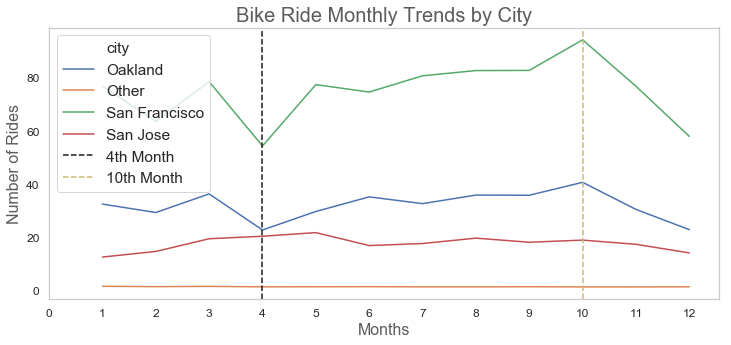

In [31]:
fig, ax = plt.subplots(figsize = [12,5])
sb.set_style("whitegrid")
ax = sb.lineplot(x='start_month',y='avg_bike_trips_month', hue='city',data=df_bike_month)
ax.grid(False)
ax.tick_params(labelsize=12)
plt.xticks(np.arange(0,13,1))
plt.title('Bike Ride Monthly Trends by City',fontsize=20,alpha=0.75)
plt.xlabel('Months',size = 16,alpha=0.75)
plt.ylabel("Number of Rides",size = 16,alpha=0.75)

xcoords = [4, 10]
colors = ['k','y']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='{}th Month'.format(xc), c=c, linestyle ='dashed')

plt.legend()

plt.savefig(folder_plots + '\\'+'Bike_Ride_Monthly_TrendBy_City.png');

>For both San Francisco and Oakland area we show decrease of riders in the month of April while it is peak in the month of October.San Jose shows relatively consistent number of rides across all months of the year.

### Historical Growth of the Number of Bike Rides by city

In [32]:
ticks = ['2017-07-01','2017-08-01', '2017-09-01', '2017-10-01','2017-11-01', '2017-12-01','2018-01-01','2018-02-01',\
         '2018-03-01','2018-04-01','2018-05-01', '2018-06-01','2018-07-01','2018-08-01', '2018-09-01','2018-10-01',\
         '2018-11-01', '2018-12-01','2019-01-01','2019-02-01','2019-03-01','2019-04-01']
labels = ['{}'.format(val) for val in ticks]

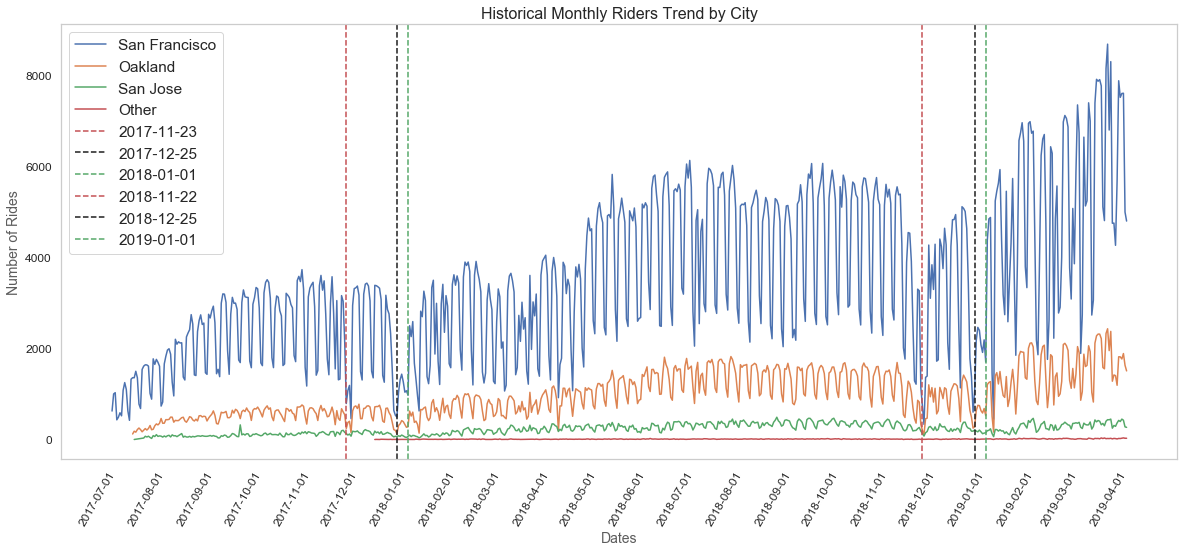

In [33]:
plt.figure(figsize = [20, 8])
data = pd.pivot_table(df_plt,index='start_date',columns='city',values='bike_id',aggfunc ='count')
data_piv = pd.DataFrame(data,data.index,['San Francisco','Oakland','San Jose','Other'])

sb.set_style("whitegrid")
ax = sb.lineplot(data=data_piv,dashes=False)
ax.grid(False)

ax.tick_params(labelsize=12)
plt.xticks(ticks, labels)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=60,ha="right")
plt.title('Historical Monthly Riders Trend by City',fontsize=16)
plt.xlabel('Dates',fontsize=14,alpha=0.75)
plt.ylabel("Number of Rides",fontsize=14,alpha=0.75)

#Just Added few marks to show the impact of holidays on major holidays: Thanksgiving, X-MASS, and New Year Eve. 
xcoords = ["2017-11-23", "2017-12-25","2018-01-01","2018-11-22", "2018-12-25","2019-01-01"]
colors = ['r','k','g','r','k','g']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='{}'.format(xc), c=c, linestyle ='dashed')
plt.legend()
plt.savefig(folder_plots + '\\'+'HistoricalMonthlyTrend_Riders_City.png');

>From previous analysis we show busy hours are aligned with the commute hours and from the lineplot what we show is the big drops on the number of rides are around Thanksgiving, X-Max, and New Year. The rate of increase after new year in 2019 is considerably very high comparing with the increase after January 1 of 2018. This is mainly due to the high number of bikes brought in service, about 2000 just in the first two months of 2019.

>Note that San Francisco riders rate of increase is not comparable to other cities as shown in the lineplot. 

In [34]:
df_station = df_plt.groupby(['start_year_month','city'])['start_station_id'].size().reset_index().\
merge(df_plt.groupby(['start_year_month','city'])['start_station_id'].nunique().reset_index(),on=['start_year_month','city'])
df_station = df_station.rename(columns={"start_year_month": "start_year_month", "start_station_id_x": "station_trips","start_station_id_y": "unique_stations"})
df_station['avg_station_trips'] = round(df_station['station_trips']/df_station['unique_stations'],1)
df_station.nlargest(5,'avg_station_trips')

,start_year_month,city,station_trips,unique_stations,avg_station_trips
78,19-03,San Francisco,189158,160,1182.2
42,18-06,San Francisco,143189,131,1093.0
46,18-07,San Francisco,142249,132,1077.6
38,18-05,San Francisco,133436,126,1059.0
58,18-10,San Francisco,146834,145,1012.6


>There are 160 unique stations in March of 2019 in San Francisco, serving 189,158 rides with average station trips of 1,182. In a similar manner there were 126 unique stations in May 2018, serving 133,436 rides with average trips of 1,059. As the number of stations increases the average station trips also increases.

### Historical Growth of the Number of Bike Rides by User Type

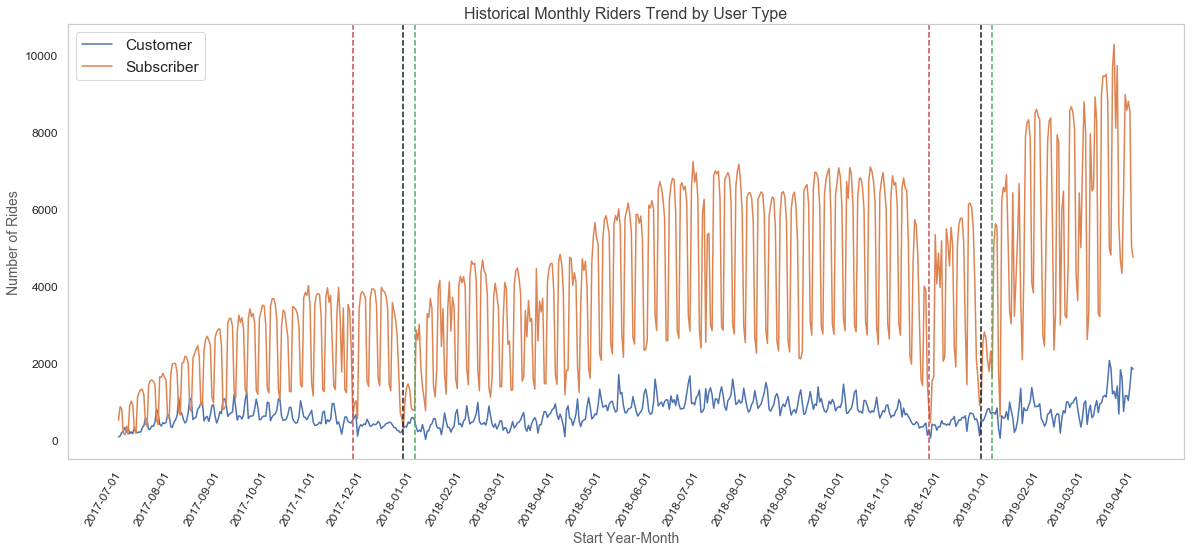

In [35]:
plt.close('all')
plt.figure(figsize = [20, 8])
data = pd.pivot_table(df_plt,index='start_date',columns='user_type',values='bike_id',aggfunc ='count')
data_piv = pd.DataFrame(data,data.index,['Customer', 'Subscriber'])

sb.set_style("whitegrid")
ax = sb.lineplot(data=data_piv,dashes=False)
ax.grid(False)
plt.xticks(ticks, labels)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=60,ha="right")
ax.tick_params(labelsize=12)
plt.title('Historical Monthly Riders Trend by User Type',fontsize=16,alpha=0.9)
plt.xlabel('Start Year-Month',fontsize=14,alpha=0.75)
plt.ylabel("Number of Rides",fontsize=14,alpha=0.75)

#Just Added few marks to show the impact of holidays on major holidays: Thanksgiving, X-MASS, and New Year Eve. 
xcoords = ["2017-11-23", "2017-12-25","2018-01-01","2018-11-22", "2018-12-25","2019-01-01"]
colors = ['r','k','g','r','k','g']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='{}'.format(xc), c=c, linestyle ='dashed')
    
plt.savefig(folder_plots + '\\'+'HistoricalMonthlyTrend_Riders_User.png');

>Increase of Subscribers riders are generally at higher rate than customer, this rate is more visible during 2019.

Go to `2_FordGoBike_Exploratory_Part2` [here](https://github.com/abebe64/FordGoBike/2_FordGoBike_Exploratory_Part2.ipynb)